This is a customized version of the VGG16 model created to recognize 3 type of objects, it's possible to make more object recognizable setting more nodes in the Dense layer (and obviously adding more folders(=classes) to train the model)

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.applications import vgg16 as _vgg16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.optimizers import Adam

print('Notebook running: tensorflow ', tf.__version__)

Notebook running: tensorflow  2.4.1


In [2]:
#creating model

model = VGG16(
    input_shape=(224, 224, 3), 
    include_top=False,
    pooling='avg'
)

In [3]:
#adding new layers

x = Dropout(rate=0.4)(model.output) #avoid overfitting
x = Dense(3)(x) #number of elements
x = Softmax()(x)
model= Model(model.inputs, x)

In [4]:
#making only the new layers trainable

for layer in model.layers[:-3]:
    layer.trainable = False

In [5]:
#compiling model

model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy',
)

In [6]:
#data augmentation generator

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

training = datagen.flow_from_directory( 
    'images',
    target_size=(224, 224),  
    subset='training'
) 

validation = datagen.flow_from_directory( 
    'images',
    target_size=(224, 224),
    subset='validation'
) 

Found 690 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [7]:
#training model

batch_size=32
history = model.fit(
    training,
    steps_per_epoch=training.samples // batch_size,
    epochs=10,
    #callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)],
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)


Epoch 1/10
21/21 [==============================] - 34s 1s/step - loss: 5.5985 - val_loss: 1.3210
Epoch 2/10
21/21 [==============================] - 15s 699ms/step - loss: 2.5798 - val_loss: 0.5718
Epoch 3/10
21/21 [==============================] - 15s 700ms/step - loss: 1.2333 - val_loss: 0.3742
Epoch 4/10
21/21 [==============================] - 15s 690ms/step - loss: 1.0752 - val_loss: 0.4130
Epoch 5/10
21/21 [==============================] - 15s 702ms/step - loss: 0.9203 - val_loss: 0.2676
Epoch 6/10
21/21 [==============================] - 15s 691ms/step - loss: 0.5982 - val_loss: 0.2789
Epoch 7/10
21/21 [==============================] - 15s 692ms/step - loss: 0.5765 - val_loss: 0.2580
Epoch 8/10
21/21 [==============================] - 15s 702ms/step - loss: 0.4691 - val_loss: 0.3444
Epoch 9/10
21/21 [==============================] - 15s 700ms/step - loss: 0.3972 - val_loss: 0.1499
Epoch 10/10
21/21 [==============================] - 15s 702ms/step - loss: 0.4033 - val_loss:

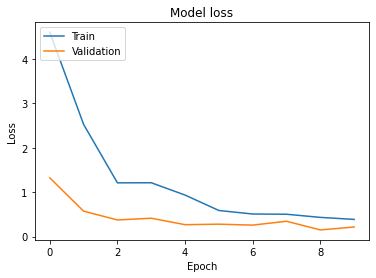

In [8]:
#plotting model performance

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
model._name = 'AkinolaVGG16'

In [10]:
model.save('C:\\Users\\samsn\\Documents\\Projects\\Thesis\\data\\model')

INFO:tensorflow:Assets written to: C:\Users\samsn\Documents\Projects\Thesis\data\model4\assets
